# *`Import libraries`* 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, __all__, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

# *`importing & splitting our dataset`*

In [ ]:
dt = pd.read_csv("iphone_purchase_records.csv")
X = dt.iloc[:, :-1].values
y = dt.iloc[:, -1:].values

# *`convert categorical data(gender) into numerical data`*

In [ ]:
le = preprocessing.LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

# *`Split Data into training and testing`*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)


# *`feature scaling - normalization aka optimization `*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# *`Logistic Regression Classifier`*

In [ ]:
classifier = LogisticRegression(random_state=0, solver="liblinear", penalty='l2')
classifier.fit(X_train, y_train.ravel())

LogisticRegression(random_state=0, solver='liblinear')

# *`Prediction`*

In [ ]:
y_pred = classifier.predict(X_test)

# *`Confusion Matrix`*

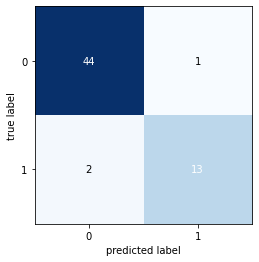

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

#*`Accuracy score percentage`*

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy * 100)

Accuracy score: 95.0


#*`Precision score percentage`*

In [ ]:
precision = metrics.precision_score(y_test, y_pred)
print("Precision score:", precision * 100)

Precision score: 92.85714285714286


#*`Recall score percentage`*

In [ ]:
recall = metrics.recall_score(y_test, y_pred)
print("Recall score:", recall * 100)

Recall score: 86.66666666666667


# `calculate the fpr and tpr for all thresholds of the classification`


In [ ]:
probs = classifier.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# *`ROC curve`*

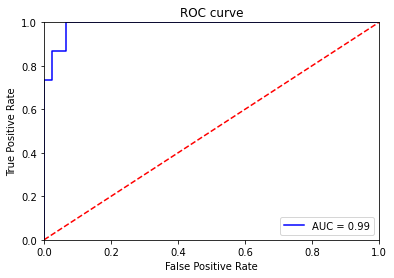

In [ ]:
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()